<a href="https://www.kaggle.com/code/ziadhamadafathy/visualizing-detect-smoke-using-5-models-100-acc?scriptVersionId=107050280" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/smoke-detection-dataset/smoke_detection_iot.csv


# Preparing data

In [2]:
df = pd.read_csv('../input/smoke-detection-dataset/smoke_detection_iot.csv')

In [3]:
df

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [4]:
df.drop(columns = ['Unnamed: 0'], inplace=True)

In [5]:
df

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
UTC,0,0.0
Temperature[C],0,0.0
Humidity[%],0,0.0
TVOC[ppb],0,0.0
eCO2[ppm],0,0.0
Raw H2,0,0.0
Raw Ethanol,0,0.0
Pressure[hPa],0,0.0
PM1.0,0,0.0
PM2.5,0,0.0


In [7]:
df.dtypes

UTC                 int64
Temperature[C]    float64
Humidity[%]       float64
TVOC[ppb]           int64
eCO2[ppm]           int64
Raw H2              int64
Raw Ethanol         int64
Pressure[hPa]     float64
PM1.0             float64
PM2.5             float64
NC0.5             float64
NC1.0             float64
NC2.5             float64
CNT                 int64
Fire Alarm          int64
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UTC,62630.0,1.654792e+09,110002.488078,1.654712e+09,1.654743e+09,1.654762e+09,1.654778e+09,1.655130e+09
Temperature[C],62630.0,1.597042e+01,14.359576,-2.201000e+01,1.099425e+01,2.013000e+01,2.540950e+01,5.993000e+01
Humidity[%],62630.0,4.853950e+01,8.865367,1.074000e+01,4.753000e+01,5.015000e+01,5.324000e+01,7.520000e+01
TVOC[ppb],62630.0,1.942058e+03,7811.589055,0.000000e+00,1.300000e+02,9.810000e+02,1.189000e+03,6.000000e+04
eCO2[ppm],62630.0,6.700210e+02,1905.885439,4.000000e+02,4.000000e+02,4.000000e+02,4.380000e+02,6.000000e+04
Raw H2,62630.0,1.294245e+04,272.464305,1.066800e+04,1.283000e+04,1.292400e+04,1.310900e+04,1.380300e+04
Raw Ethanol,62630.0,1.975426e+04,609.513156,1.531700e+04,1.943500e+04,1.950100e+04,2.007800e+04,2.141000e+04
Pressure[hPa],62630.0,9.386276e+02,1.331344,9.308520e+02,9.387000e+02,9.388160e+02,9.394180e+02,9.398610e+02
PM1.0,62630.0,1.005943e+02,922.524245,0.000000e+00,1.280000e+00,1.810000e+00,2.090000e+00,1.433369e+04
PM2.5,62630.0,1.844678e+02,1976.305615,0.000000e+00,1.340000e+00,1.880000e+00,2.180000e+00,4.543226e+04


# Correlation among features

<AxesSubplot:>

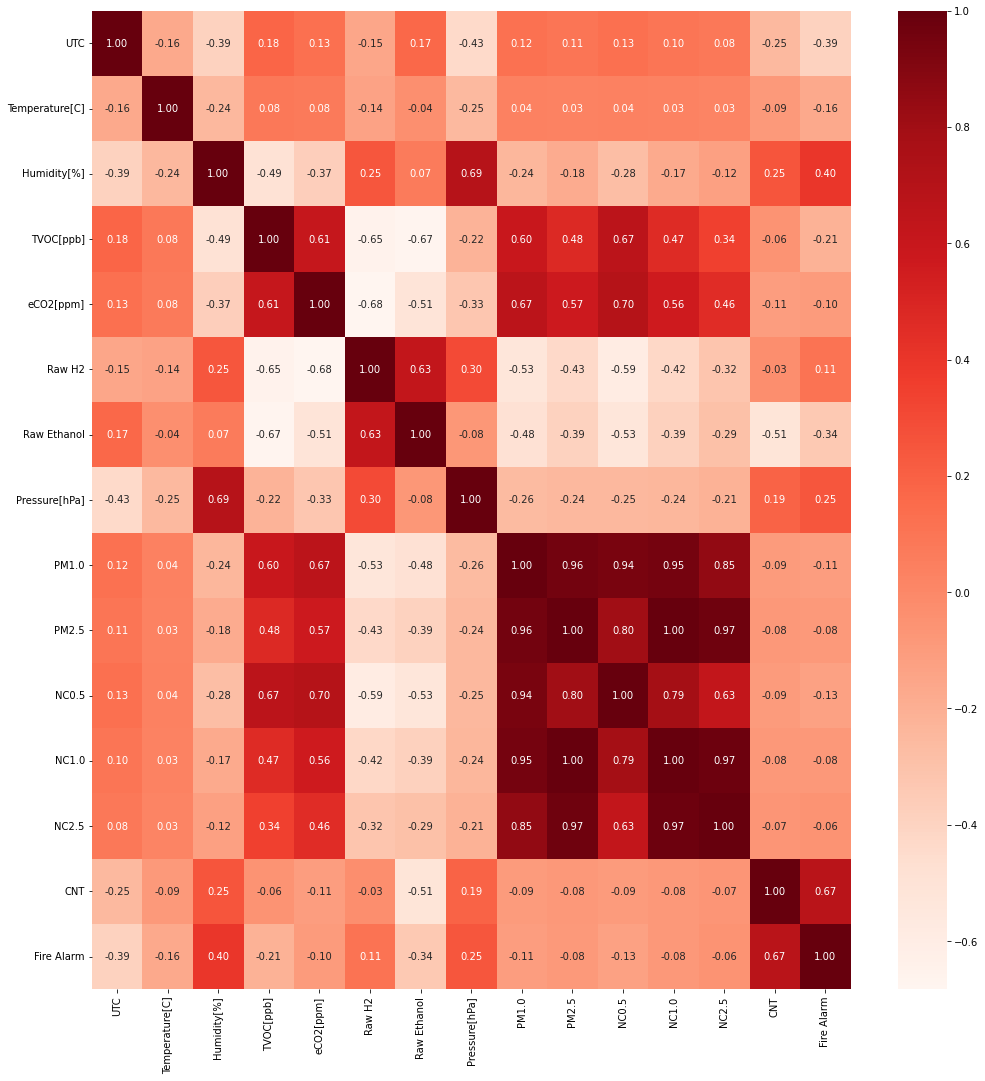

In [9]:
plt.figure(figsize=(17,18))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,fmt='.2f')

# Visualizing positive correlation features

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fire Alarm', ylabel='count'>

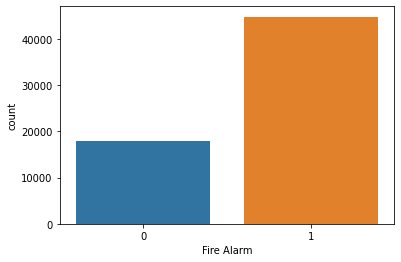

In [10]:
sns.countplot(df['Fire Alarm'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='CNT'>

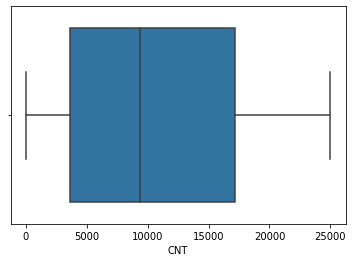

In [11]:
sns.boxplot(df['CNT'])

<AxesSubplot:xlabel='Humidity[%]', ylabel='Count'>

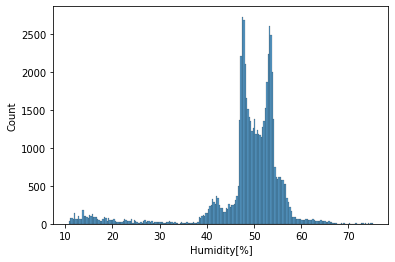

In [12]:
sns.histplot(df['Humidity[%]'])

<AxesSubplot:xlabel='Pressure[hPa]', ylabel='Count'>

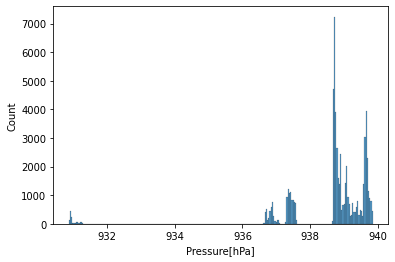

In [13]:
sns.histplot(df[r'Pressure[hPa]'])

**We will choose the positive correlation features with target to use it in models**

In [14]:
X = df.drop(columns='Fire Alarm')
y = df['Fire Alarm']

In [15]:
FeatureSelection = SelectKBest(score_func= f_classif ,k=4)
x = FeatureSelection.fit_transform(X, y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True)

# ML Classifier Models

# Decision Tree

In [17]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(X_train, y_train)

print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))

DecisionTreeClassifierModel Train Score is :  1.0
DecisionTreeClassifierModel Test Score is :  0.9999201660546064


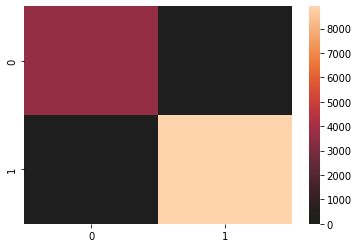

Confusion Matrix is
 [[3614    1]
 [   0 8911]]


In [18]:
y_pred_DT = DecisionTreeClassifierModel.predict(X_test)
CM_DT = confusion_matrix(y_test, y_pred_DT)

sns.heatmap(CM_DT, center=True)
plt.show()

print('Confusion Matrix is\n', CM_DT)

# Gradient Boosting

In [19]:
GBCModel = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=44) 
GBCModel.fit(X_train, y_train)

print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))

GBCModel Train Score is :  1.0
GBCModel Test Score is :  0.9999201660546064


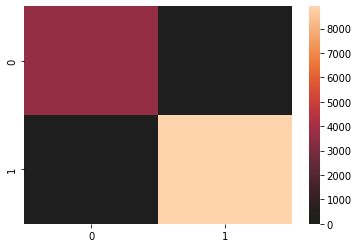

Confusion Matrix is
 [[3614    1]
 [   0 8911]]


In [20]:
y_pred_GB = GBCModel.predict(X_test)
CM_GB = confusion_matrix(y_test, y_pred_GB)

sns.heatmap(CM_GB, center=True)
plt.show()

print('Confusion Matrix is\n', CM_GB)


# Random Forest

In [21]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'entropy', max_depth=6, n_estimators=200, random_state=44)
RandomForestClassifierModel.fit(X_train, y_train)

print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))

RandomForestClassifierModel Train Score is :  0.9999800415136516
RandomForestClassifierModel Test Score is :  0.9999201660546064


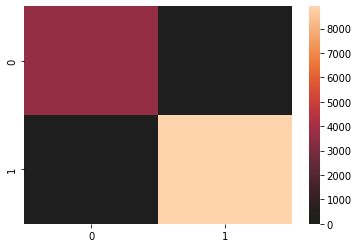

Confusion Matrix is
 [[3614    1]
 [   0 8911]]


In [22]:
y_pred_RF = RandomForestClassifierModel.predict(X_test)
CM_RF = confusion_matrix(y_test, y_pred_RF)

sns.heatmap(CM_RF, center=True)
plt.show()

print('Confusion Matrix is\n', CM_RF)

# K Nearest Neighbors

In [23]:
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 7,weights ='distance',algorithm='auto')
KNNClassifierModel.fit(X_train, y_train)

print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(X_test, y_test))

KNNClassifierModel Train Score is :  1.0
KNNClassifierModel Test Score is :  0.9997604981638193


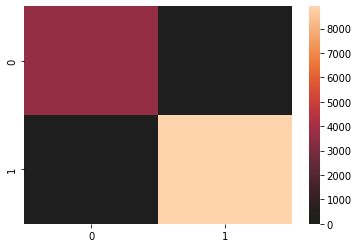

Confusion Matrix is
 [[3612    3]
 [   0 8911]]


In [24]:
y_pred_K = KNNClassifierModel.predict(X_test)
CM_K = confusion_matrix(y_test, y_pred_K)

sns.heatmap(CM_K, center=True)
plt.show()

print('Confusion Matrix is\n', CM_K)

# Voting Classifier

In [25]:
VotingClassifierModel = VotingClassifier(estimators=[('GBCModel',GBCModel),
                                                     ('DTModel',DecisionTreeClassifierModel),
                                                     ('RFModel',RandomForestClassifierModel),
                                                     ('KNNModel',KNNClassifierModel)],
                                         voting='hard')
VotingClassifierModel.fit(X_train, y_train)

print('VotingClassifierModel Train Score is : ' , VotingClassifierModel.score(X_train, y_train))
print('VotingClassifierModel Test Score is : ' , VotingClassifierModel.score(X_test, y_test))

VotingClassifierModel Train Score is :  1.0
VotingClassifierModel Test Score is :  0.9999201660546064


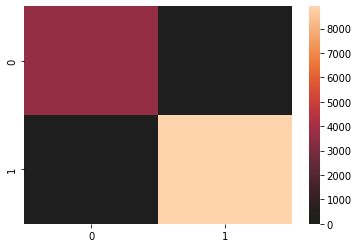

Confusion Matrix is
 [[3614    1]
 [   0 8911]]


In [26]:
y_pred_V = VotingClassifierModel.predict(X_test)
CM_V = confusion_matrix(y_test, y_pred_V)

sns.heatmap(CM_V, center=True)
plt.show()

print('Confusion Matrix is\n', CM_V)